In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_path = Path("../data/")
data_path

PosixPath('../data')

In [3]:
ds = xr.open_dataset('ERA5_YR_merged.nc')
#ds
#timax = ds.time.max(keep_attrs = True)
#timax
u_ds = ds.u
#u_ds.mean(['longitude','latitude'])

In [4]:
u_ds.time

<xarray.DataArray 'time' (time: 32144)>
array(['1994-01-01T00:00:00.000000000', '1994-01-01T03:00:00.000000000',
       '1994-01-01T06:00:00.000000000', ..., '2005-12-31T15:00:00.000000000',
       '2005-12-31T21:00:00.000000000', '2005-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1994-01-01 ... 2005-12-31T23:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [4]:
#u_ds = u_ds.sel(time='1991')

In [5]:
u_dstar = u_ds.resample(time="D").mean()

In [6]:
u_dstar

<xarray.DataArray 'u' (time: 4383, level: 18, latitude: 45, longitude: 81)>
array([[[[ 9.49058166e+00,  9.36397632e+00,  9.22995591e+00, ...,
          -1.37331018e+00, -1.50211258e+00, -1.63146424e+00],
         [ 8.76253228e+00,  8.61505491e+00,  8.45824005e+00, ...,
          -1.88412566e+00, -2.00331594e+00, -2.12003453e+00],
         [ 8.00042854e+00,  7.83537472e+00,  7.65906099e+00, ...,
          -2.40977127e+00, -2.51577921e+00, -2.61849157e+00],
         ...,
         [-1.62152462e+01, -1.63687655e+01, -1.65192638e+01, ...,
          -2.07928121e+01, -2.08329083e+01, -2.08455414e+01],
         [-1.68551388e+01, -1.70075595e+01, -1.71528398e+01, ...,
          -2.11712549e+01, -2.11822402e+01, -2.11586219e+01],
         [-1.75046434e+01, -1.76543178e+01, -1.77905353e+01, ...,
          -2.15005387e+01, -2.14837861e+01, -2.14390211e+01]],

        [[-2.93459298e+00, -2.78464392e+00, -2.65172204e+00, ...,
          -6.68798825e+00, -6.72478893e+00, -6.76625836e+00],
         [-3.20840107e+00, -3.05598032e+00, -2.92141065e+00, ...,
          -6.94586767e+00, -6.98376689e+00, -7.02413779e+00],
         [-3.50994698e+00, -3.35450528e+00, -3.21197128e+00, ...,
          -7.21335922e+00, -7.25812423e+00, -7.30865652e+00],
...
         [ 1.14243224e+01,  1.12509713e+01,  1.11147038e+01, ...,
           9.33527940e+00,  8.71045011e+00,  8.40024282e+00],
         [ 1.12256603e+01,  1.10564295e+01,  1.09036804e+01, ...,
           9.84856357e+00,  9.06009551e+00,  8.55917255e+00],
         [ 1.10417138e+01,  1.08945567e+01,  1.07482824e+01, ...,
           1.00024900e+01,  9.42092487e+00,  8.92794839e+00]],

        [[ 2.51502592e+01,  2.52023528e+01,  2.52206003e+01, ...,
           1.80381537e+01,  1.79686956e+01,  1.78701003e+01],
         [ 2.49036238e+01,  2.49798512e+01,  2.50266472e+01, ...,
           1.75757860e+01,  1.74760134e+01,  1.73579934e+01],
         [ 2.44574433e+01,  2.45448547e+01,  2.46196105e+01, ...,
           1.71460870e+01,  1.70227694e+01,  1.68876791e+01],
         ...,
         [ 1.09416469e+01,  1.09063292e+01,  1.09080951e+01, ...,
           9.52187468e+00,  9.57661714e+00,  9.38649009e+00],
         [ 1.09813794e+01,  1.09331118e+01,  1.08936737e+01, ...,
           9.05156040e+00,  9.21578779e+00,  9.06303866e+00],
         [ 1.09669580e+01,  1.09236938e+01,  1.08683627e+01, ...,
           9.04067077e+00,  9.02360054e+00,  8.79226949e+00]]]])
Coordinates:
  * time       (time) datetime64[ns] 1994-01-01 1994-01-02 ... 2005-12-31
  * longitude  (longitude) float32 -10.0 -9.75 -9.5 -9.25 ... 9.25 9.5 9.75 10.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 4.75 4.5 4.25 4.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 200.0 225.0 250.0 300.0

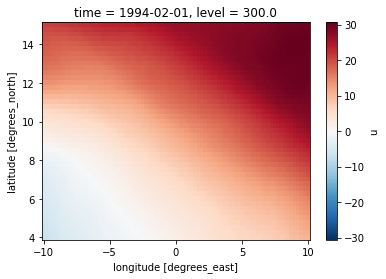

In [7]:
u_dstar.sel(level=300)[31].plot()

In [11]:
#v_ds = ds.v
#v_ds.mean(['longitude','latitude'])

DD = v_ds.mean(['longitude','latitude'])#.plot()
fig=plt.figure(figsize=(16,6))
DD.T.plot(vmin = -20, vmax = 20, cmap='RdBu')
plt.ylim(300,0)

<h2> Rainfall graph <h2>

In [8]:
dss = xr.open_dataset ('cru_merged.nc')
dss

<xarray.Dataset>
Dimensions:  (time: 480, lon: 720, lat: 360)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-16 1981-02-15 ... 2020-12-16
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    pre      (time, lat, lon) float64 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.05 Precipitation
    history:      Wed Dec 15 12:54:25 2021: cdo -b F64 -f nc2 mergetime cru_t...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [9]:
#dss.pre
dss.time

<xarray.DataArray 'time' (time: 480)>
array(['1981-01-16T00:00:00.000000000', '1981-02-15T00:00:00.000000000',
       '1981-03-16T00:00:00.000000000', ..., '2020-10-16T00:00:00.000000000',
       '2020-11-16T00:00:00.000000000', '2020-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-16 1981-02-15 ... 2020-12-16
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

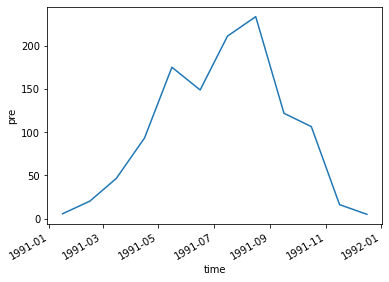

In [14]:
-q0c = dss.sel(lon = slice(-10,10) ,lat = slice(4,15))#selecting west africa nearest cordinate
tt = loc.sel(time='1991') #seclecting the year 1991
dss_s = tt.mean(['lon','lat'])#.plot()
RR = dss_s.pre #selecting precipitation data and assigning it to RR
RR.plot()

Text(0, 0.5, 'Rainfall (mm)')

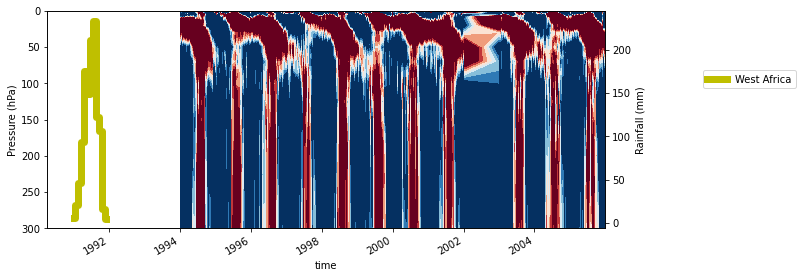

In [15]:
fig,axes = plt.subplots(figsize=(10,4))
pp = u_ds.mean(['longitude','latitude'])#.plot()
pp.T.plot.contourf(vmin = -5, vmax = 5, cmap='RdBu', ax = axes, add_colorbar=False)
axes.set_ylim(300,0)
axes.set_ylabel('Pressure (hPa)')

ax1 = axes.twinx()
RR.resample(time='MS').mean().plot.step(where='mid', ax = ax1, color='y', linewidth = 7, label = 'West Africa')
ax1.legend(loc=0, bbox_to_anchor=(1.35,0.75))
ax1.set_ylabel('Rainfall (mm)')

In [ ]:
RR

In [ ]:
RR.plot.step(where='mid')

In [ ]:
#import numpy as np
plt.bar(RR.time['time.month'], RR.values, data=RR)
#plt.xticks(np.arange(1,13,),np.arange(1,13,))

In [ ]:
fig=plt.figure(figsize=(16,6))
RR.plot.bar(ax=ax)
#RR = dss_s.pre #.plot()
#plt.bar(RR['time'], RR['data']) #color='midnightblue') 
#dss_s.pre.plot()#vnim = -5, vmax = 5, cmap='RdBu')
#plt.ylim(200,0)